# NNによる学習フロー

##  1.データを集める (今回はload_data()でダウンロード)  
##  2.データを正規化  
##  3.モデル（レイヤー構成）を定義  
##   1.Sequentialモデルを仕様（3層のニューラルネットワーク）  
##  4.最適化手法や損失関数などを定義（compile）  
##  5.トレーニング（機械学習を実行）(fit)  
##  6.制度を評価する（テストデータをevaluate） ⇒3に戻る、または1を工夫する（前処理）  

In [1]:
import tensorflow
from tensorflow import keras

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt

In [4]:
batch_size = 128 # バッチサイズ
num_class = 10 # 識別クラス数（出力層のノードの数）
epochs = 10 # 学習回数

In [5]:
# keras内蔵のMNISTデータセットを利用する
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [6]:
x_train.shape

(60000, 28, 28)

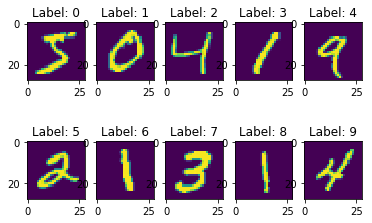

In [7]:
# とりあえず最初の10個を表示してみる
# (28*28)画像として表示するが、元々(28,28)なのでreshapeは不要
for i in range(10):
    plt.subplot(2, 5, i +1) # 2行5列
    plt.title("Label: " + str(i))
    plt.imshow(x_train[i], cmap=None)

In [8]:
# 上の画像の出力と教師データがあってるかみてみよう
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [9]:
# 以上でデータの確認

# 最適化手法を定義して学習する

In [10]:
# 正規化
x_train, x_test = x_train / 255.0, x_test / 255.0

In [11]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [12]:
# モデルを決める
model = keras.models.Sequential([
    keras.layers.Flatten(), 
    # 入力を平滑化する．
    keras.layers.Dense(512, activation='relu'),
    # Dense:通常の全結合ニューラルネットワークレイヤー．activation:活性化関数 活性化関数
    keras.layers.Dropout(0.2), 
    # 20% 訓練時の更新においてランダムに入力ユニットを0とする割合であり，過学習の防止に役立つ
    keras.layers.Dense(10, activation='softmax') 
    # 出力前のノード数はクラス分類数の10, 活性化関数はsoftmaxにする
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [13]:
# 最適化手法を決める(compile)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# optimizer:最適化手法
# loss: 損失関数、正解との誤差をどう計算するか
# metrics: 評価指標

# optimizer...
#   勾配法の中でも実際に深層学習で主に用いられている手法(SGD, Momentum SGD, AdaGrad, RMSprop, AdaDelta, Adam)
# https://qiita.com/tokkuman/items/1944c00415d129ca0ee9

# 学習(fit)
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 9s 149us/sample - loss: 9833.7067 - acc: 0.0063
Epoch 2/20
60000/60000 [==============================] - 9s 156us/sample - loss: 24152.2230 - acc: 0.0157
Epoch 3/20
60000/60000 [==============================] - 9s 154us/sample - loss: 35058.1383 - acc: 0.0216
Epoch 4/20
60000/60000 [==============================] - 9s 155us/sample - loss: 44821.2906 - acc: 0.0258
Epoch 5/20
60000/60000 [==============================] - 9s 155us/sample - loss: 54017.7366 - acc: 0.0298
Epoch 6/20
60000/60000 [==============================] - 9s 155us/sample - loss: 63052.9305 - acc: 0.0335
Epoch 7/20
60000/60000 [==============================] - 9s 152us/sample - loss: 71796.3898 - acc: 0.0362
Epoch 8/20
60000/60000 [==============================] - 9s 157us/sample - loss: 79999.7723 - acc: 0.0389
Epoch 9/20
60000/60000 [==============================] - 11s 180us/sample - loss: 88274.7151 - acc: 0.0414
Epoch 10/20
60000/60000 [============

In [14]:
# 結果見たらacc:0.07と７％しか正解できてない

# 損失関数を変えてみる sparse_categorical_crossentropy
model = keras.models.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 11s 177us/sample - loss: 0.2190 - acc: 0.9360
Epoch 2/5
60000/60000 [==============================] - 10s 171us/sample - loss: 0.0963 - acc: 0.9699
Epoch 3/5
60000/60000 [==============================] - 10s 171us/sample - loss: 0.0691 - acc: 0.9784
Epoch 4/5
60000/60000 [==============================] - 10s 166us/sample - loss: 0.0532 - acc: 0.9830
Epoch 5/5
60000/60000 [==============================] - 10s 159us/sample - loss: 0.0426 - acc: 0.9865


In [19]:
# 98.5%と良い精度なのでこれでテストする

# evaluateで未知データのテスト
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 69us/sample - loss: 0.2424 - acc: 0.9315


[0.2423651490420103, 0.9315]

In [15]:
# 93%正解した

# 実際に正解しているかデータを見てみる
y_test[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

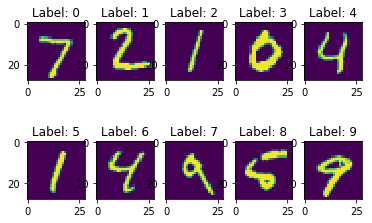

In [16]:
for i in range(10):
    plt.subplot(2, 5, i +1) # 2行5列
    plt.title("Label: " + str(i))
    plt.imshow(x_test[i], cmap=None)

In [18]:
# 8以外あってる

In [19]:
# テストデータから予測して、予測が合っているかは　　　　model.evaluate(x_test, y_test)
# テストデータから予測したときの、ラベルの推定値を出す　model.predict(x_test[0:10])

model.predict(x_test[0:10])
# 確率を見てみよう

array([[6.24073737e-10, 1.55500535e-09, 5.90278262e-08, 7.75491208e-06,
        4.42856445e-13, 6.05331230e-10, 1.17903789e-15, 9.99991536e-01,
        7.12919515e-11, 6.22319646e-07],
       [5.82287829e-10, 4.64630602e-06, 9.99995232e-01, 1.11967488e-07,
        9.31685632e-16, 2.84823415e-10, 4.99661423e-10, 1.25925080e-16,
        1.23081980e-08, 1.00427398e-13],
       [1.20984875e-08, 9.99537706e-01, 1.28748448e-04, 4.67280216e-07,
        6.95748968e-05, 3.58889861e-06, 1.89565503e-06, 1.80946270e-04,
        7.65337827e-05, 4.44854891e-07],
       [9.99835849e-01, 6.20845197e-09, 3.53148316e-05, 1.04253047e-07,
        1.69449194e-07, 6.80709888e-07, 3.61941625e-06, 1.26223576e-05,
        3.18030828e-08, 1.11733825e-04],
       [1.37338396e-09, 5.59805891e-12, 1.68686114e-08, 6.83175808e-11,
        9.99579132e-01, 3.26268873e-10, 2.39168951e-08, 2.90100616e-07,
        6.54003351e-10, 4.20594122e-04],
       [2.35244851e-10, 9.99932051e-01, 1.09827994e-07, 9.60565405e-09,
   

# MNIST3層ニューラルネットのディープラーニング終わり

# 補足
sparse_categorical_crossentropyとcategorical_crossentropy  
誤差関数に使用するsparse_categorical_crossentropyとcategorical_crossentropyの違いについて補足しておきます。  
  
categorical_crossentropyは、ターゲットがOne-Hot-Encoding（配列の1要素だけが値を持つ）で  
  
[1,0,0]  
  
[0,1,0]  
  
[0,0,1]  
  
のようなフォーマットになります。  
  
  
sparse_categorical_crossentropyは、ターゲットが整数のラベルになる場合（MNISTだと0から９）に使用します。  
  
1  
  
2  
  
3  
    
のような値を指しています。  
   
categorical_crossentropyを使用したい場合は、正解ラベルを番号ではなく、One-Hot-Encodingフォーマットにする  
  
to_categorical  
  
関数を使ってベクトルへの変形を行います。  

In [20]:
# fashionMNISTで行ってみよう

In [21]:


import tensorflow
from tensorflow import keras

%matplotlib inline

import matplotlib.pyplot as plt

batch_size = 128
num_class = 10
epochs = 10

# keras内蔵のFashionMNISTデータセットを利用する
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [22]:
x_train.shape # MNISTと同じ構成

(60000, 28, 28)

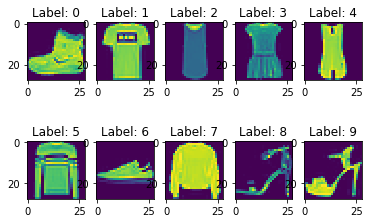

In [23]:
for i in range(10):
    plt.subplot(2,5, i+1)
    plt.title('Label: ' + str(i))
    plt.imshow(x_train[i].reshape(28,28), cmap=None)

In [24]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [25]:
# カテゴリの番号と内容の対応
# 0:T-shirt/top
# 1: Trouser
# 2: Pullover
# 3: Dress
# 4: Coat
# 5: Sandal
# 6: Shirt
# 7: Sneaker
# 8: Bag
# 9: Ankel boot

In [26]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [27]:
model = keras.models.Sequential([
    keras.layers.Flatten(), 
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.2), 
    keras.layers.Dense(10, activation='softmax') 
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.4983 - acc: 0.8211
Epoch 2/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.3812 - acc: 0.8600
Epoch 3/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.3497 - acc: 0.8707
Epoch 4/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.3295 - acc: 0.8789
Epoch 5/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.3135 - acc: 0.8844
Epoch 6/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.3014 - acc: 0.8875
Epoch 7/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.2895 - acc: 0.8925
Epoch 8/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.2791 - acc: 0.8953
Epoch 9/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.2729 - acc: 0.8980
Epoch 10/10
60000/60000 [==============================] - 3s 51us/sample - loss: 

In [28]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 21us/sample - loss: 0.3379 - acc: 0.8827


[0.33791856489777566, 0.8827]